In [1]:
import Pkg

In [2]:
Pkg.activate("D:\\Users\\gabri\\Documents\\Data Science & Machine Learning Spring 2025\\Lundquist-CMOR438-Spring2025\\juMLia")

  Activating project at `D:\Users\gabri\Documents\Data Science & Machine Learning Spring 2025\Lundquist-CMOR438-Spring2025\juMLia`


In [5]:
temp = [[1,2], [3,4]]
all(length.(temp) .== 2)

true

In [3]:
import MLDatasets: Iris
using Plots, DataFrames
irisdata = Iris()

setosadata = subset(irisdata.dataframe, :class => species -> isequal.(species, "Iris-setosa"))
versicolordata = subset(irisdata.dataframe, :class => species -> isequal.(species, "Iris-versicolor"))
virginicadata = subset(irisdata.dataframe, :class => species -> isequal.(species, "Iris-virginica"))

Row,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,String15
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.8,2.7,5.1,1.9,Iris-virginica
3,7.1,3.0,5.9,2.1,Iris-virginica
4,6.3,2.9,5.6,1.8,Iris-virginica
5,6.5,3.0,5.8,2.2,Iris-virginica
6,7.6,3.0,6.6,2.1,Iris-virginica
7,4.9,2.5,4.5,1.7,Iris-virginica
8,7.3,2.9,6.3,1.8,Iris-virginica
9,6.7,2.5,5.8,1.8,Iris-virginica


In [4]:
include("SingleNeuronJulia.jl")

In [ ]:
include("Single Neuron (draft)/SingleNeuronJulia.jl")

In [5]:
logregdata = subset(irisdata.dataframe, :class => (species -> isequal.(species, "Iris-virginica") .|| isequal.(species, "Iris-versicolor")))
logreginputs = logregdata[:, [:petallength, :sepallength]]
logregtargets = map(species -> (species == "Iris-versicolor" ? 0 : 1), logregdata[:, :class])


100-element PooledArrays.PooledVector{Int64, UInt32, Vector{UInt32}}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [8]:
logregmodel = SingleNeuron(2, :logisticregression)
@time train!(logregmodel, logreginputs, logregtargets; numepochs=1000, learningrate=0.01)

  0.524063 seconds (2.01 M allocations: 103.944 MiB, 3.44% gc time, 98.92% compilation time)


1001-element Vector{Float64}:
 0.6931471805599452
 1.4988713681795582
 1.4809216956548834
 1.4612228480659208
 1.4418602734607169
 1.4228323550125799
 1.4041345975697335
 1.3857625789144945
 1.367711948082004
 1.349978419963792
 1.3325577702744986
 1.3154458308458465
 1.29863848521304
 ⋮
 0.2746341319159757
 0.2745704613255485
 0.2745068648204933
 0.27444334221046807
 0.2743798933058891
 0.2743165179179495
 0.27425321585859735
 0.2741899869405453
 0.27412683097725854
 0.2740637477829457
 0.2740007371725703
 0.2739377989618343

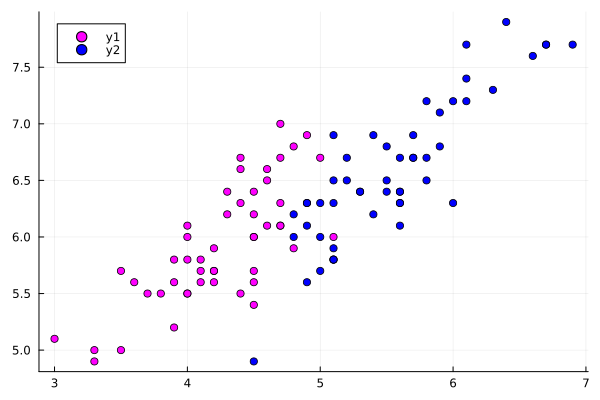

In [9]:
scatter(versicolordata[:, :petallength], versicolordata[:, :sepallength], markercolor=:magenta)
scatter!(virginicadata[:, :petallength], virginicadata[:, :sepallength], markercolor=:blue)

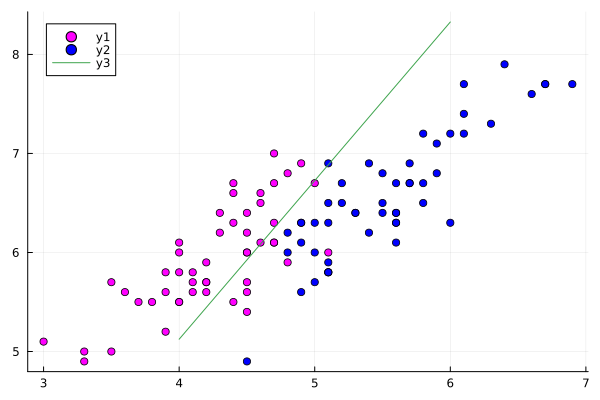

In [10]:
plotneuron!(logregmodel; leftbound=4, rightbound=6)

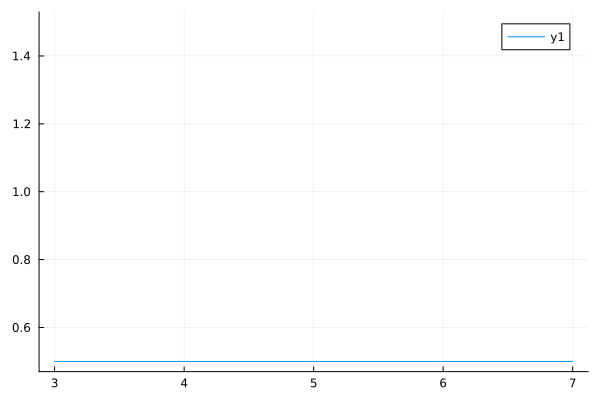

In [6]:
logreg1Dmodel = SingleNeuron(1, :logisticregression)
logreg1Ddata = subset(irisdata.dataframe, :class => (species -> isequal.(species, "Iris-virginica") .|| isequal.(species, "Iris-versicolor")))
logreg1Dtargets = map(logreg1Ddata[:, :class]) do species
    if species == "Iris-virginica"
        return 0
    elseif species == "Iris-versicolor"
        return 1
    else
        return NaN
    end
end
logreg1Dinputs = logreg1Ddata[:, :petallength]
plotneuron(logreg1Dmodel; leftbound=3, rightbound=7)


In [7]:
@time train!(logreg1Dmodel, logreg1Dinputs, logreg1Dtargets; numepochs=10_000, learningrate=0.01)


  0.729558 seconds (2.43 M allocations: 164.292 MiB, 5.85% gc time, 90.73% compilation time)


10001-element Vector{Float64}:
 0.6931471805599452
 1.053790779079499
 1.0603871086213126
 1.0565319228489758
 1.052558996943378
 1.0486092847452475
 1.044684557088316
 1.040784693471718
 1.0369095479459025
 1.0330589744710752
 1.0292328272756825
 1.0254309608748786
 1.021653230083781
 ⋮
 0.1823462960956358
 0.18234495013563576
 0.18234360448764336
 0.182342259151566
 0.18234091412730766
 0.18233956941477078
 0.18233822501386418
 0.18233688092448982
 0.1823355371465553
 0.18233419367996398
 0.18233285052462228
 0.1823315076804349

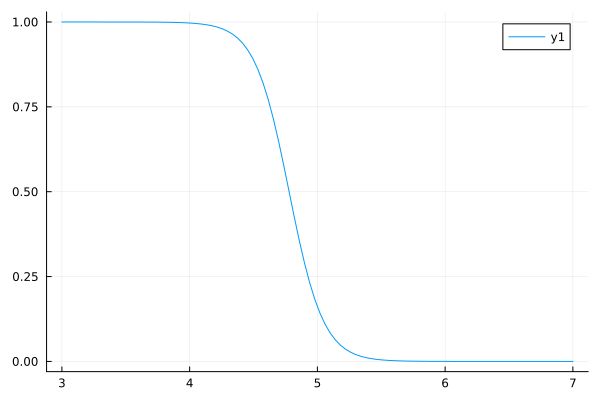

In [31]:
plotneuron(logreg1Dmodel; leftbound=3, rightbound=7)

In [ ]:
function plotlinreg(neur::SingleNeuron)
    scatter(versicolordata[:, :sepallength], versicolordata[:, :sepalwidth], label = "Versicolor data", ms=3)
    SingleNeuronJulia.plotneuron!(neur; leftbound=minimum(versicolordata[:, :sepallength]), rightbound=maximum(versicolordata[:, :sepallength]))
end
linregmodel = SingleNeuron(1, :linearregression)
plotlinreg(linregmodel)


In [ ]:
train!(linregmodel, versicolordata[:, :sepallength], versicolordata[:, :sepalwidth], numepochs=10)


In [ ]:
perceptrondata = subset(irisdata.dataframe, :class => species -> isequal.(species, "Iris-setosa") .|| isequal.(species, "Iris-versicolor"))
perceptrontargets = map(perceptrondata[:, :class]) do species
    if species == "Iris-setosa"
        return 1
    elseif species == "Iris-versicolor"
        return -1
    else
        return NaN
    end
end
perceptroninputs = perceptrondata[:, [:sepallength, :sepalwidth]]
plotdomain = range(minimum(perceptrondata[:, :sepallength]), maximum(perceptrondata[:, :sepallength]), length=100)
perceptronlinefunc(x, neur::SingleNeuron) = (neur.weights[1].*x .+ neur.bias) ./ -neur.weights[2]
function plotperceptron(neur::SingleNeuron)
    scatter(setosadata[:, :sepallength], setosadata[:, :sepalwidth], label="Setosa", mc=:blue, ms=3)
    scatter!(versicolordata[:, :sepallength], versicolordata[:, :sepalwidth], label="Versicolor", mc=:magenta, ms=3)
    plot!(plotdomain, perceptronlinefunc(plotdomain, neur))
end


In [ ]:
perceptronmodel = SingleNeuron(2, :perceptron)
predict(perceptronmodel, perceptroninputs)
plotperceptron(perceptronmodel)


In [ ]:
train!(perceptronmodel, perceptroninputs, perceptrontargets; learningrate=0.05, numepochs=5)

In [ ]:
using MLDatasets
using Plots
using DataFrames

In [ ]:
irisdata = Iris()

In [ ]:
perceptrondata = subset(irisdata.dataframe, :class => species -> isequal.(species, "Iris-setosa") .|| isequal.(species, "Iris-versicolor"))
perceptrontargets = map(perceptrondata[:, :class]) do species
    if species == "Iris-setosa"
        return 1
    elseif species == "Iris-versicolor"
        return -1
    else
        return NaN
    end
end
perceptroninputs = perceptrondata[:, [:sepallength, :sepalwidth]]
setosadata = subset(irisdata.dataframe, :class => species -> isequal.(species, "Iris-setosa"))
versicolordata = subset(irisdata.dataframe, :class => species -> isequal.(species, "Iris-versicolor"))

In [ ]:
include("Single Neuron (draft)/SingleNeuronJulia.jl")

In [ ]:
plotdomain = range(minimum(perceptrondata[:, :sepallength]), maximum(perceptrondata[:, :sepallength]), length=100)
perceptronlinefunc(x, neur::SingleNeuron) = (neur.weights[1].*x .- neur.bias) ./ -neur.weights[2]
function plotperceptron(neur::SingleNeuron)
    scatter(setosadata[:, :sepallength], setosadata[:, :sepalwidth], label="Setosa", mc=:blue, ms=3)
    scatter!(versicolordata[:, :sepallength], versicolordata[:, :sepalwidth], label="Versicolor", mc=:magenta, ms=3)
    plot!(plotdomain, perceptronlinefunc(plotdomain, neur))
end

In [ ]:
gr()

Plots.GRBackend()

In [ ]:
include("SingleNeuronJulia.jl")

In [ ]:
perceptron_model = SingleNeuron(2, :perceptron)

SingleNeuron{typeof(sign_zeropositive), typeof(perceptronstochasticgradient), typeof(perceptronloss)}(Main.SingleNeuronJulia.sign_zeropositive, Main.SingleNeuronJulia.perceptronstochasticgradient, Main.SingleNeuronJulia.perceptronloss, [0.0, 0.0], 0.0, [0.0, 0.0], 0.0, Float64[], Float64[])

In [ ]:
plotly()

Plots.PlotlyBackend()

In [ ]:
x = range(0,10,100)
y = sin.(x)
p = plot(x,y)

In [ ]:
using LinearAlgebra

In [ ]:
"Returns -1 if the argument is less than 0, 1 otherwise."
sign_zeropositive(value) = value < 0.0 ? -1 : 1

"Returns the argument."
linear(value) = value

"""
Returns the value of the sigmoid function at input_value.
    
    https://en.wikipedia.org/wiki/Sigmoid_function 
"""
sigmoid(value) = 1.0 / (1.0 + exp(-value))


In [ ]:
mat = [1 2; 3 4]

In [ ]:
2size([1,2,3])[end]

In [ ]:
function perceptronloss(predictions, targets)
    return 0.25 * sum((predictions .- targets).^2)
end

function linearregressionloss(predictions::AbstractArray, targets::AbstractArray)
    return ( (1 / 2(size(targets)[end])) * sum((predictions .- targets).^2) )
end

function linearregressionloss(prediction::Number, target::Number)
    return ( 0.5 * (prediction - target)^2)
end

function binarycrossentropyloss(predictions::AbstractArray, targets::AbstractArray)
    return ( (1 / size(targets)[end]) 
            * sum(-targets .* log.(predictions)
                  - ((1 .- targets).*log.(1 .- predictions))) )
end

function binarycrossentropyloss(prediction::Number, target::Number)
    return ( -target * log(prediction)
                  - ((1 - target)*log(1 - prediction)) )
end

function meansquarederror(predictions, targets)
    return 0.5 .* (predictions .- targets).^2
end

In [ ]:
function perceptronstochasticgradient(prediction, target)
    return 0.5 * (prediction .- target)
end

function regressionstochasticgradient(prediction, target)
    return prediction .- target
end

In [ ]:
function preactivation(input, weights, bias)
    return dot(input, weights) + bias
end

In [ ]:
const type_perceptron = "perceptron"
const type_linearregression = "linear regression"
const type_logisticregression = "logistic regression"

In [ ]:
mutable struct SingleNeuron{ActivatorF, GradientF, LossF}
    const activationfunction::ActivatorF
    const gradient::GradientF
    const loss::LossF
    weights::Vector{Float64}
    bias::Float64
    previousweights::Vector{Float64}
    previousbias::Float64
    losshistory::Array{Float64,1}
    prevlosshistory::Array{Float64,1}
end 

In [ ]:
SingleNeuron(activationfunction::Function, 
             gradientfunction::Function, 
             lossfunction::Function, 
             weights::Vector{Float64}, 
             bias::Float64) = begin
        SingleNeuron{typeof(activationfunction), 
                    typeof(gradientfunction), 
                    typeof(lossfunction)}(activationfunction, gradientfunction, lossfunction, 
                                        weights, bias, weights, bias, [], [])
    end


In [ ]:

SingleNeuron(datadimension::Int; 
             modeltype::String, 
             weights::Vector{Float64}=zeros(Float64, datadimension), 
             bias::Float64=0.0) = begin
        if length(weights) != datadimension
            error("Provided weight vector has length $(length(weights)) \
                    not of the supplied dimension $datadimension")
        end
        if modeltype == type_perceptron
            return SingleNeuron(sign_zeropositive, perceptronstochasticgradient, 
                                perceptronloss, weights, bias)
        elseif modeltype == type_linearregression
            return SingleNeuron(linear, regressionstochasticgradient, 
                                linearregressionloss, weights, bias)
        elseif modeltype == type_logisticregression
            return SingleNeuron(sigmoid, regressionstochasticgradient, 
                                binarycrossentropyloss, weights, bias)
        else
            error("\"$modeltype\" not a recognized model.")
        end
    end

In [ ]:
perceptron = SingleNeuron(2; modeltype="perceptron")

In [ ]:
struct Test{dimension}
    a::Vector{Float64}
end

In [ ]:
a = Array{Float64,3}(undef)

In [ ]:
isconcretetype(Vector{Float64})

In [ ]:
x::Vector{Float64} = [1,2,3]

In [ ]:
typeof(x)

In [ ]:
x[3] = pi

In [ ]:
typeof(x)

In [ ]:
@show test = Test{3}([1,2,3])
@show test.a[2] = pi
@show test.af
@show isconcretetype(test.a)
b = Array{Float64, 3}(nothing, 3)
@show isconcretetype(b)
b[1] = 1

In [ ]:
typeof(regressionstochasticgradient)

In [ ]:
length([1,2,3])

In [ ]:
zeros(Float64, 5)

In [ ]:
preactivation(pred, [targ, 0], 0)

In [ ]:
func = regressionstochasticgradient

In [ ]:
@show pred = [-5, 1.2]
@show targ = [-4.9, pi]

In [ ]:
func(pred, targ)

In [ ]:
testvals = (-5, 1.2, pi)

In [ ]:
size([1...])[end]

In [ ]:
1 .- (1,2,3)

In [ ]:
using Random

In [ ]:
func = sigmoid

In [ ]:
[(func(val), val) for val in (-5, -0.1, pi)]

In [ ]:
map(val -> [sign_zeropositive(val), val], randn(5))
[(sign_zeropositive(val), val) for val in randn(5)]

In [ ]:
sign_zeropositive(0)

In [ ]:
x = 3

In [ ]:
@show x